
### Basic analysis of weapons in Fortnite

Article can be found here: https://ministryofdata.fandom.com/wiki/Fortnite_weapons

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from math import pi
import matplotlib.colors as mcolors
from scipy import stats

# silence warnings
warnings.filterwarnings('ignore')

In [2]:
# upload data to notebook from file 
df = pd.read_csv('./data/Fortnite_BR_Weapon_Attributes.csv', sep=';')

In [3]:
# create data grouped by Type and stacked by Rarity with count number of weapons
df_stacked = df.groupby(['Type', 'Rarity']).count().unstack(1)

In [4]:
df_stacked.head()

Name                                 DPS                      \
Rarity         Common Epic Legendary Rare Uncommon Common Epic Legendary Rare   
Type                                                                            
Assault Rifles    2.0  2.0       1.0  3.0      2.0    2.0  2.0       1.0  3.0   
Explosives        NaN  2.0       2.0  2.0      NaN    NaN  2.0       2.0  2.0   
Pistols           2.0  1.0       1.0  2.0      2.0    2.0  1.0       1.0  2.0   
Shotguns          1.0  1.0       NaN  1.0      2.0    1.0  1.0       NaN  1.0   
Sniper Rifles     NaN  2.0       2.0  1.0      NaN    NaN  2.0       2.0  1.0   

                         ... Ammo Cost                              Impact  \
Rarity         Uncommon  ...    Common Epic Legendary Rare Uncommon Common   
Type                     ...                                                 
Assault Rifles      2.0  ...       2.0  2.0       1.0  3.0      2.0    2.0   
Explosives          NaN  ...       NaN  2.0       2.0  2.0      NaN    NaN   
Pistols             2.0  ...       2.0  1.0       1.0  2.0      2.0    2.0   
Shotguns            2.0  ...       1.0  1.0       NaN  1.0      2.0    1.0   
Sniper Rifles       NaN  ...       NaN  2.0       2.0  1.0      NaN    NaN   

                                             
Rarity         Epic Legendary Rare Uncommon  
Type                                         
Assault Rifles  2.0       1.0  3.0      2.0  
Explosives      2.0       2.0  2.0      NaN  
Pistols         1.0       1.0  2.0      2.0  
Shotguns        1.0       NaN  1.0      2.0  
Sniper Rifles   2.0       2.0  1.0      NaN  

[5 rows x 60 columns]

#### Colours of rarity weapons

Handmade - White

Common - Gray

Uncommon - Green

Rare - Blue

Epic - Purple

Legendary - Orange

Mythic - Gold

Marvel - Dark Red

Dark - Magenta

Transcendent - Light Red

Template:DC - Light Grey

In [5]:
# calculate number of weapons for each type and rarity and sum of all types
df_stacked2 = df_stacked[[('Impact', 'Common'),
                          ('Impact', 'Uncommon'),
                          ('Impact', 'Rare'),
                          ('Impact', 'Epic'),
                          ('Impact', 'Legendary'),
                         ]]
df_stacked2['sum'] = df_stacked2.sum(axis=1)
df_stacked2.sort_values('sum', inplace=True)

# define colors of rarity
colors = [
    'gray',
    'green',
    'blue',
    'purple',
    'orange'
]

df_stacked2

Impact                                sum
Rarity          Common Uncommon Rare Epic Legendary      
Type                                                     
Shotguns           1.0      2.0  1.0  1.0       NaN   5.0
Sniper Rifles      NaN      NaN  1.0  2.0       2.0   5.0
Explosives         NaN      NaN  2.0  2.0       2.0   6.0
Pistols            2.0      2.0  2.0  1.0       1.0   8.0
Submachine Guns    2.0      3.0  3.0  1.0       NaN   9.0
Assault Rifles     2.0      2.0  3.0  2.0       1.0  10.0

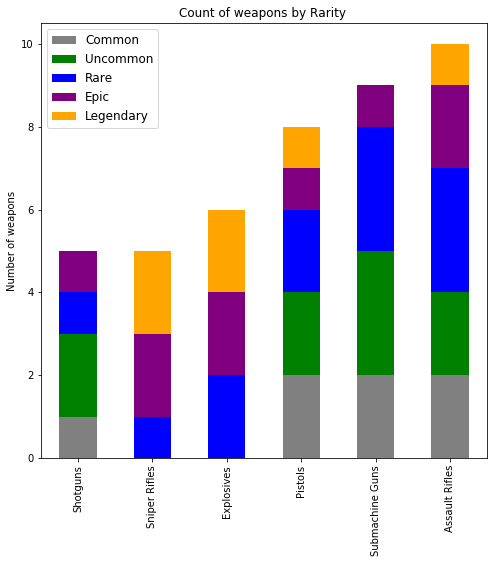

In [6]:
# generate plot with count of weapons

ax = df_stacked2['Impact'].plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True, color=colors
                                     )
plt.title('Count of weapons by Rarity ')
plt.xlabel('')
plt.ylabel('Number of weapons')
h,l = ax.get_legend_handles_labels()
ax.legend(h[:],l[:], loc=2, fontsize=12)
plt.savefig('images/fortnite_count_weapons.png', type='png', bbox_inches='tight')

plt.show()

In [7]:
# we are returning to the original data
df.head()

,Name,DPS,Damage,Critical %,Crit. Damage,Fire Rate,Mag. Size,Range,Durability,Reload Time,Ammo Cost,Impact,Rarity,Type
0,Scar,198.0,36,0,0,5.5,30,1.0,?,2.1,1,31,Legendary,Assault Rifles
1,Scar,192.5,35,0,0,5.5,30,1.0,?,2.1,1,29,Epic,Assault Rifles
2,Scoped Rifle,84.0,24,0,0,3.5,20,1.0,?,2.2,1,29,Epic,Assault Rifles
3,Scoped Rifle,80.5,23,0,0,3.5,20,1.0,?,2.3,1,28,Rare,Assault Rifles
4,M4,181.5,33,0,0,5.5,30,1.0,?,2.2,1,28,Rare,Assault Rifles


In [8]:
# group data by type and calculate mean, normalize it as % of maximal value for weapons
df_grouped = df.groupby('Type').mean()
df_grouped2 = df_grouped / df_grouped.max(axis=0) * 100
df_grouped2

,DPS,Damage,Critical %,Crit. Damage,Fire Rate,Mag. Size,Range,Reload Time,Ammo Cost,Impact
Type,,,,,,,,,,
Assault Rifles,76.561939,27.009063,NaN,NaN,41.188235,88.421053,32.552083,43.065693,100.0,2.237100
Explosives,51.633752,100.000000,NaN,NaN,7.720588,11.052632,32.552083,45.924574,100.0,100.000000
Pistols,67.614452,33.648036,NaN,NaN,40.202206,38.684211,32.552083,31.706204,100.0,5.376313
Shotguns,48.043088,71.782477,NaN,NaN,10.411765,21.473684,100.000000,100.000000,100.0,26.111047
Sniper Rifles,28.448833,83.383686,NaN,NaN,5.982353,14.526316,32.552083,48.540146,100.0,18.686367
Submachine Guns,100.000000,15.105740,NaN,NaN,100.000000,100.000000,32.552083,39.537713,100.0,1.877717


In [9]:
# define color map for types of weapons
color_map = {
    'Shotguns': 'blue',
    'Sniper Rifles': 'orange',
    'Explosives': 'green',
    'Pistols': 'purple',
    'Submachine Guns': 'yellow',
    'Assault Rifles': 'gray'
}

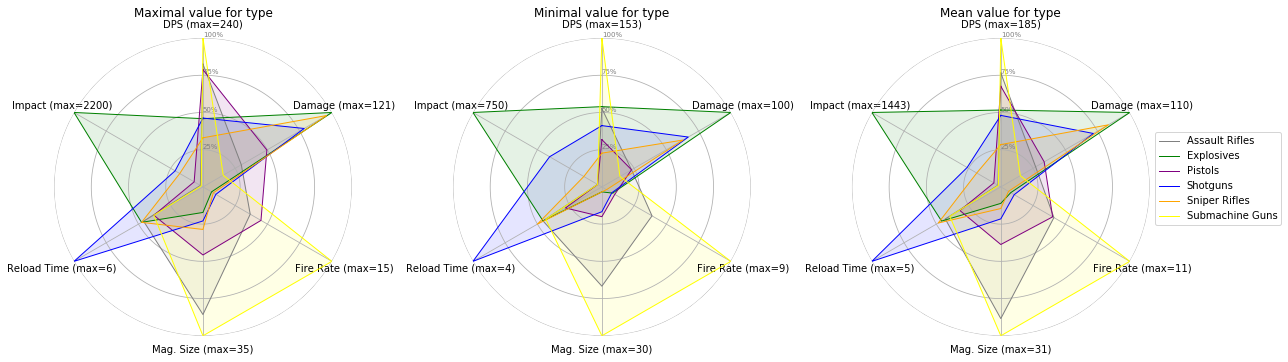

In [10]:
# Create spider plot for types of weapons
Fig, axs = plt.subplots(1,3, figsize=(18,6))

# for each subplot calculate max, min and mean values
for ax_no in [131, 132, 133]:
    if ax_no == 131:
        df_grouped = \
        df[['Type', 'DPS', 'Damage', 'Fire Rate', 'Mag. Size', 'Reload Time', 'Impact']].groupby('Type').max()
        title = "Maximal value for type"
    elif ax_no == 132:
        df_grouped = \
        df[['Type', 'DPS', 'Damage', 'Fire Rate', 'Mag. Size', 'Reload Time', 'Impact']].groupby('Type').min()
        title = "Minimal value for type"
    else:
        df_grouped = \
        df[['Type', 'DPS', 'Damage', 'Fire Rate', 'Mag. Size', 'Reload Time', 'Impact']].groupby('Type').mean()
        title = "Mean value for type"
    df_grouped2 = df_grouped / df_grouped.max(axis=0) * 100


    categories=['DPS', 'Damage', 'Fire Rate', 'Mag. Size', 'Reload Time', 'Impact']
    
    categories = [
        '{} (max={})'.format(c, int(df_grouped[c].max())) for c in categories
    ]

    N = len(categories)

    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    ax = plt.subplot(ax_no, polar=True)

    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    plt.xticks(angles[:-1], categories)

    ax.set_rlabel_position(0)
    plt.yticks([25,50,75,100], ["25%","50%","75%","100%"], color="grey", size=7)
    plt.ylim(0,100)

    for i in df_grouped2.index:
        values=df_grouped2.loc[i, ['DPS', 'Damage', 'Fire Rate', 'Mag. Size', 'Reload Time', 'Impact']].values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=i, color=color_map[i])
        ax.fill(angles, values, color_map[i], alpha=0.1)
    ax.set_title(title)
    ax.spines['polar'].set_visible(False)


plt.legend(loc=0, bbox_to_anchor=(1, 0.7))
plt.tight_layout()
plt.savefig('images/fortnite_type_spider.png', type='png', bbox_inches='tight')
plt.show()

In [11]:
# define color map for rarity of weapons
color_map2 = {
    'Common': 'gray',
    'Uncommon': 'green',
    'Rare': 'blue',
    'Epic': 'purple',
    'Legendary': 'orange'
}

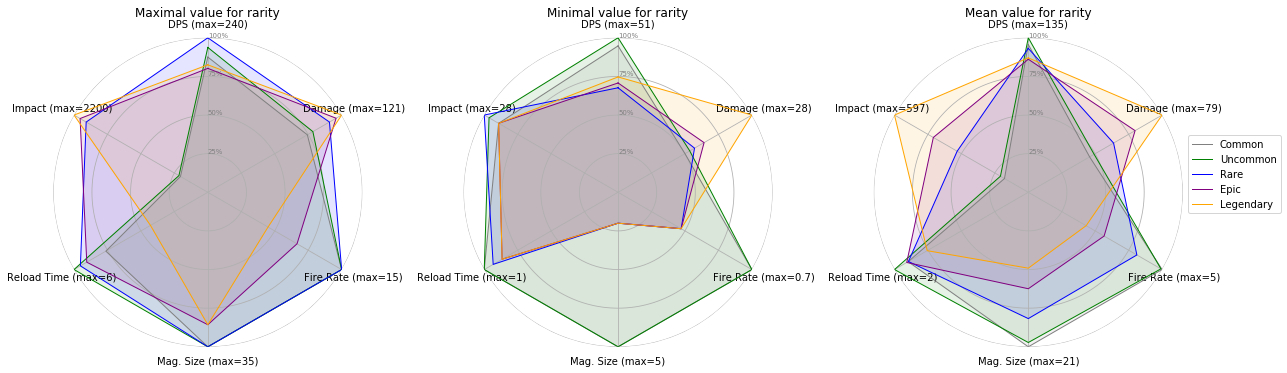

In [12]:
# Create spider plot for rarity of weapons

Fig, axs = plt.subplots(1,3, figsize=(18,6))


for ax_no in [131, 132, 133]:
    if ax_no == 131:
        df_grouped = \
        df[['Rarity', 'DPS', 'Damage', 'Fire Rate', 'Mag. Size', 'Reload Time', 'Impact']].groupby('Rarity').max()
        title = "Maximal value for rarity"
    elif ax_no == 132:
        df_grouped = \
        df[['Rarity', 'DPS', 'Damage', 'Fire Rate', 'Mag. Size', 'Reload Time', 'Impact']].groupby('Rarity').min()
        title = "Minimal value for rarity"
    else:
        df_grouped = \
        df[['Rarity', 'DPS', 'Damage', 'Fire Rate', 'Mag. Size', 'Reload Time', 'Impact']].groupby('Rarity').mean()
        title = "Mean value for rarity"
    df_grouped2 = df_grouped / df_grouped.max(axis=0) * 100
    df_grouped2 = df_grouped2.loc[['Common', 'Uncommon', 'Rare', 'Epic', 'Legendary'], :]

    categories=['DPS', 'Damage', 'Fire Rate', 'Mag. Size', 'Reload Time', 'Impact']

    categories = [
        '{} (max={})'.format(c, round(df_grouped[c].max(), 1) if df_grouped[c].max() < 1
                            else int(df_grouped[c].max())) for c in categories
    ]

    N = len(categories)

    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    ax = plt.subplot(ax_no, polar=True)

    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    plt.xticks(angles[:-1], categories)

    ax.set_rlabel_position(0)
    plt.yticks([25,50,75,100], ["25%","50%","75%","100%"], color="grey", size=7)
    plt.ylim(0,100)

    for i in df_grouped2.index:
        values=df_grouped2.loc[i, ['DPS', 'Damage', 'Fire Rate', 'Mag. Size', 'Reload Time', 'Impact']].values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=i, color=color_map2[i])
        ax.fill(angles, values, color_map2[i], alpha=0.1)
    ax.set_title(title)
    ax.spines['polar'].set_visible(False)


plt.legend(loc=0, bbox_to_anchor=(1, 0.7))
plt.tight_layout()
plt.savefig('images/fortnite_rarity_spider.png', type='png', bbox_inches='tight')

plt.show()

In [13]:
# Define function for custom colormap

def make_colormap(seq):
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)

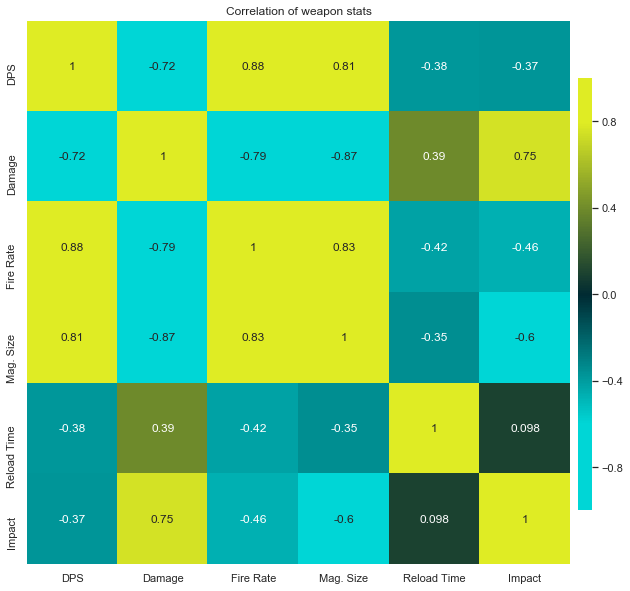

In [14]:
# Create heatmap for correlation between features

c = mcolors.ColorConverter().to_rgb
rvb = make_colormap([c('#00D6D6'), 0.2, c('#00D6D6'), c('#002A32'), 0.5, c('#002A32'),
    c('#DFEC24'), 0.9, c('#DFEC24')]
    )

df_heatmap = df[['DPS', 'Damage', 'Fire Rate',
       'Mag. Size', 'Reload Time',
       'Impact']]
sns.set()
fig, ax = plt.subplots(1,1, figsize=(10,10))
cbar_ax = fig.add_axes([.9, .2, .02, .6])
ht = sns.heatmap(df_heatmap.corr(), annot=True, ax=ax, vmin=1, vmax=-1, cmap=rvb, square=True,
                cbar_ax = cbar_ax, cbar=True)
ht.set(title = 'Correlation of weapon stats')
ht.set_ylim(6, 0)
plt.savefig('images/fortnite_correlation.png', type='png', bbox_inches='tight')
plt.show()

In [15]:
# calculate statistical significance between features

df_corr = pd.DataFrame() # Correlation matrix
df_p = pd.DataFrame()  # Matrix of p-values
for x in df[['DPS', 'Damage', 'Fire Rate',
       'Mag. Size', 'Reload Time',
       'Impact']].columns:
    for y in df[['DPS', 'Damage', 'Fire Rate',
       'Mag. Size', 'Reload Time',
       'Impact']].columns:
        corr = stats.pearsonr(df[x], df[y])
        df_corr.loc[x,y] = corr[0]
        df_p.loc[x,y] = corr[1]


In [16]:
df_p

,DPS,Damage,Fire Rate,Mag. Size,Reload Time,Impact
DPS,0.000000e+00,4.488806e-08,1.139359e-14,3.446263e-11,0.011293,1.324516e-02
Damage,4.488806e-08,0.000000e+00,3.791079e-10,2.136243e-14,0.009358,6.040493e-09
Fire Rate,1.139359e-14,3.791079e-10,0.000000e+00,3.971639e-12,0.005447,1.766110e-03
Mag. Size,3.446263e-11,2.136243e-14,3.971639e-12,0.000000e+00,0.021376,2.160091e-05
Reload Time,1.129304e-02,9.357971e-03,5.446620e-03,2.137561e-02,0.000000,5.299139e-01
Impact,1.324516e-02,6.040493e-09,1.766110e-03,2.160091e-05,0.529914,0.000000e+00


In [17]:
df_p<0.01

,DPS,Damage,Fire Rate,Mag. Size,Reload Time,Impact
DPS,True,True,True,True,False,False
Damage,True,True,True,True,True,True
Fire Rate,True,True,True,True,True,True
Mag. Size,True,True,True,True,False,True
Reload Time,False,True,True,False,True,False
Impact,False,True,True,True,False,True


In [18]:
df_corr

,DPS,Damage,Fire Rate,Mag. Size,Reload Time,Impact
DPS,1.000000,-0.722546,0.877576,0.813239,-0.382794,-0.374912
Damage,-0.722546,1.000000,-0.787334,-0.873518,0.391855,0.752219
Fire Rate,0.877576,-0.787334,1.000000,0.833601,-0.416662,-0.463073
Mag. Size,0.813239,-0.873518,0.833601,1.000000,-0.350072,-0.599452
Reload Time,-0.382794,0.391855,-0.416662,-0.350072,1.000000,0.098458
Impact,-0.374912,0.752219,-0.463073,-0.599452,0.098458,1.000000
